# 분류 모델 - Decision Tree model

** 정의 **
- 여러가지 규칙을 순차적으로 적용하면서 독립변수 공간을 분할하는 분류모형
   - 독립변수 공간을 분할 한다.
- 분류 classification 와 회귀 regression 모두 사용가능하다. : CART (classification and regression tree) 모형   

** 분류학습 방법 **
- 여러 독립변수 중 하나의 독립변수를 선택한다.
   - 이 독립변수에 대한 기준값=분류규칙 threshold 을 정한다.
- 전체 학습 데이터 집합(부모 노드)을 독립변수의 값이 기준값보다 작은 데이터 그룹(자식 노드1)과 해당 독립변수의 값이 기준값보다 큰 데이터 그룹(자식 노드2)로 나눈다.
- 각각의 자식 노드에 대해 위와 같은 과정을 반복하여 하위의 자식 노드를 만든다.
   - 자식 노드에 한 가지 클래스의 데이터만 존재하면 더이상 자식 노드를 만들지 않고 중지한다.
- 자식 노드가 증가하는 나무와 같은 형태로 표현 된다.

** 분류 예측 원리 **
- 조건부확률 분포 : P(Y=k | X)_node
   - 훈련 데이터는 분류규칙에 의해서 특정한 노드를 따라서 내려가게 된다. 
   - 각각의 노드는 그 노드를 선택한 데이터 집합을 가진다. 
      - 알콜 농도가 0.5 이하인 데이터만 모인 노드, 알콜 농도가 0.5 보다 큰 데이터만 모인 노드
   - 이렇게 노드에 모인 데이터의 클래스의 비율을 구하여 이것을 그 노드의 조건부 확률 분포라고 한다.
      - P(Y=k | X)_node
   - 검증 데이터 X_test 의 클래스를 예측할 때는 가장 상위의 노드부터 분류 규칙을 차례로 적용하여 마지막에 도달하는 노드의 조건부 확률 분포를 이용하여 클래스를 예측한다.
      - Y^ = arg max_k P(Y=k | X_test)last node
- 즉 데이터가 분류규칙을 따라서 특정 노드에 모이게 되고, 이 노드는 모인 데이터 집합의 클래스 비율에 맞는 조건부 확률 분포를 갖게 된다. 예측은 검증 데이터가 도달한 가장 마지막 노드의 조건부 확률분포에 의해서 이루어 진다.

** 분류 규칙을 정하는 방법 ** 
- 부모 노드와 자식 노드 간의 엔트로피를 가장 낮게 만드는 최상의 독립변수와 기준값(threshold)을 찾는 것
- 정보획득량 : information gain
   - 이러한 기준을 정량화한 것이 정보획득량이다.
   - 기본적으로 모든 독립변수와 모든 기준값에 대한 정보획득량을 구하고 가장 큰 정보획득량인 독립변수와 기준값을 선택한다.
   - 즉 데이터를 어떻게 구분하느냐에 따라서 엔드로피의 값이 달라지고, 엔트로피가 낮아지는 방향, 즉 질서도가 높아지는 방향으로 기준값과 독립변수를 선택하게 된다.
   - 선택 된 독립변수와 기준값이 분류규칙이 되고 여기에 따라서 데이터가 분류되어 자식노드로 내려가게 된다.
- 정보획득량의 원리
   - Y의 엔트로피 값에서 X에 대한 Y의 조건부 엔트로피 값을 뺸 값이다.
   - IG[Y, X] = H[Y] - H[Y | X]

## 붓꽃 데이터 
- sepal length, sepal width

In [9]:
import graphviz
from sklearn.tree import export_graphviz
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import (accuracy_score, confusion_matrix, classification_report)

In [6]:
from sklearn.datasets import load_iris

iris = load_iris()
X = iris.data
y = iris.target

X.shape, y.shape

((150, 4), (150,))

In [7]:
X1 = X[:, :2]
X1.shape

(150, 2)

In [8]:
feature_names = iris.feature_names[:2]
feature_names

['sepal length (cm)', 'sepal width (cm)']

In [10]:
dt_clf = DecisionTreeClassifier(max_depth=1, criterion='entropy', random_state=0)
dt_clf.fit(X1, y)

pred = dt_clf.predict(X1)

print("acc : ", accuracy_score(y, pred))

acc :  0.64


In [15]:
print(confusion_matrix(y, pred))

[[47  0  3]
 [11  0 39]
 [ 1  0 49]]


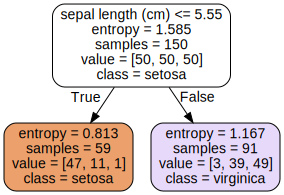

In [12]:
graph_data = export_graphviz(dt_clf, 
                             feature_names=feature_names, 
                             class_names=iris.target_names,
                             rounded=True, 
                             filled=True)
graphviz.Source(graph_data)

In [20]:
dt_clf_2 = DecisionTreeClassifier(max_depth=2, criterion='entropy', random_state=0)
dt_clf_2.fit(X1, y)

pred_2 = dt_clf_2.predict(X1)

print("acc : ", accuracy_score(y, pred_2))

acc :  0.7066666666666667


In [21]:
print(confusion_matrix(y, pred_2))

[[49  1  0]
 [ 1 10 39]
 [ 2  1 47]]


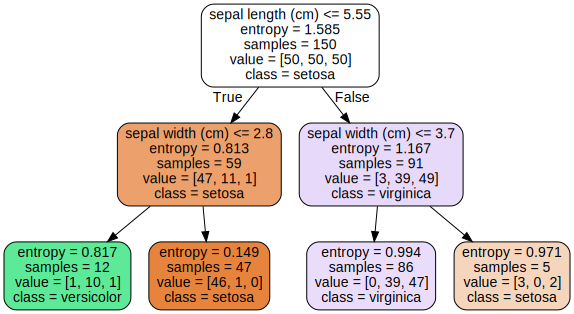

In [22]:
graph_data_2 = export_graphviz(dt_clf_2,
                              feature_names=feature_names,
                              class_names=iris.target_names,
                              rounded=True,
                              filled=True)

graphviz.Source(graph_data_2)

In [23]:
dt_clf_3 = DecisionTreeClassifier(max_depth=3, criterion='entropy', random_state=0)
dt_clf_3.fit(X1, y)

pred_3 = dt_clf_3.predict(X1)

print("acc : ", accuracy_score(y, pred_3))

acc :  0.8066666666666666


In [24]:
print(confusion_matrix(y, pred_3))

[[50  0  0]
 [ 2 34 14]
 [ 1 12 37]]


In [26]:
from sklearn.model_selection import cross_val_score

In [27]:
cv_score = cross_val_score(dt_clf_3, X1, y, scoring="accuracy", cv=5)

print("cv acc : ", np.mean(cv_score))

cv acc :  0.6933333333333332


In [29]:
dt_clf_4 = DecisionTreeClassifier(max_depth=4, criterion='entropy', random_state=0)
dt_clf_4.fit(X1, y)

pred_4 = dt_clf_4.predict(X1)

print("acc : ", accuracy_score(y, pred_4))

acc :  0.82


In [31]:
print(confusion_matrix(y, pred_4))

[[50  0  0]
 [ 0 36 14]
 [ 0 13 37]]


In [32]:
cv_score = cross_val_score(dt_clf_4, X1, y, scoring="accuracy", cv=5)

print("cv acc : ", np.mean(cv_score))

cv acc :  0.7666666666666667


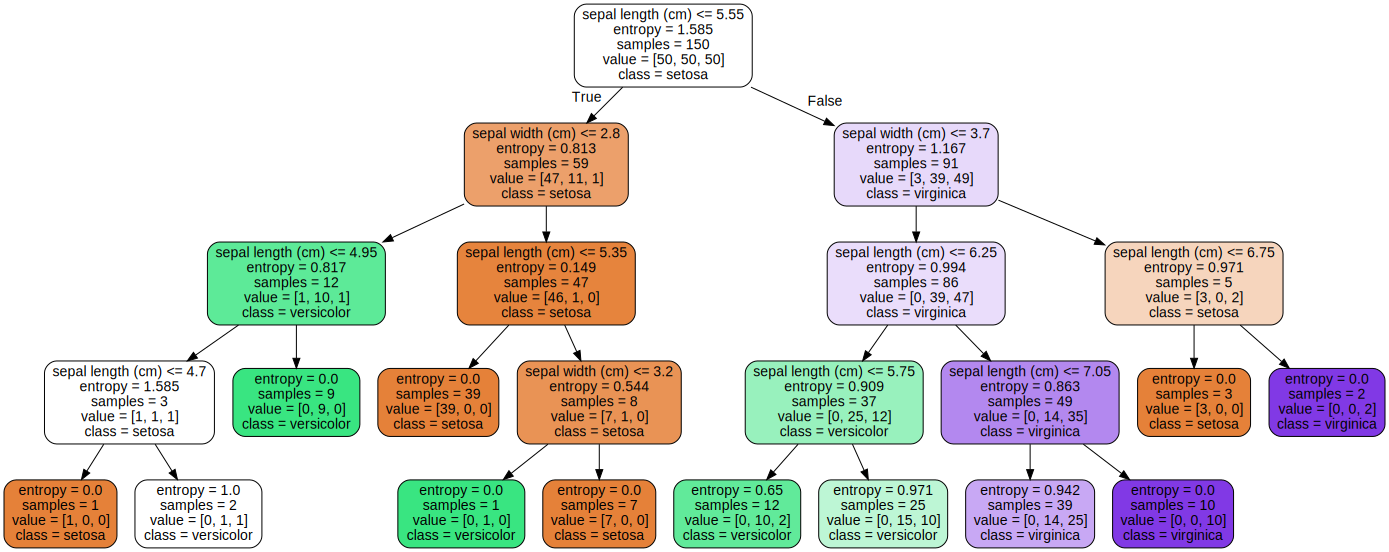

In [33]:
graph_data_4 = export_graphviz(dt_clf_4, feature_names=feature_names,
                              class_names=iris.target_names,
                              rounded=True, filled=True)

graphviz.Source(graph_data_4)

In [34]:
dt_clf_5 = DecisionTreeClassifier(max_depth=5, criterion='entropy', random_state=30)
dt_clf_5.fit(X1, y)

pred_5 = dt_clf_5.predict(X1)

print("acc : ", accuracy_score(y, pred_5))

acc :  0.8333333333333334


In [35]:
print(confusion_matrix(y, pred_5))

[[50  0  0]
 [ 0 37 13]
 [ 0 12 38]]


In [37]:
cv_score = cross_val_score(dt_clf_5, X1, y, scoring='accuracy', cv=5)

print("cv acc : ", np.mean(cv_score))

cv acc :  0.76


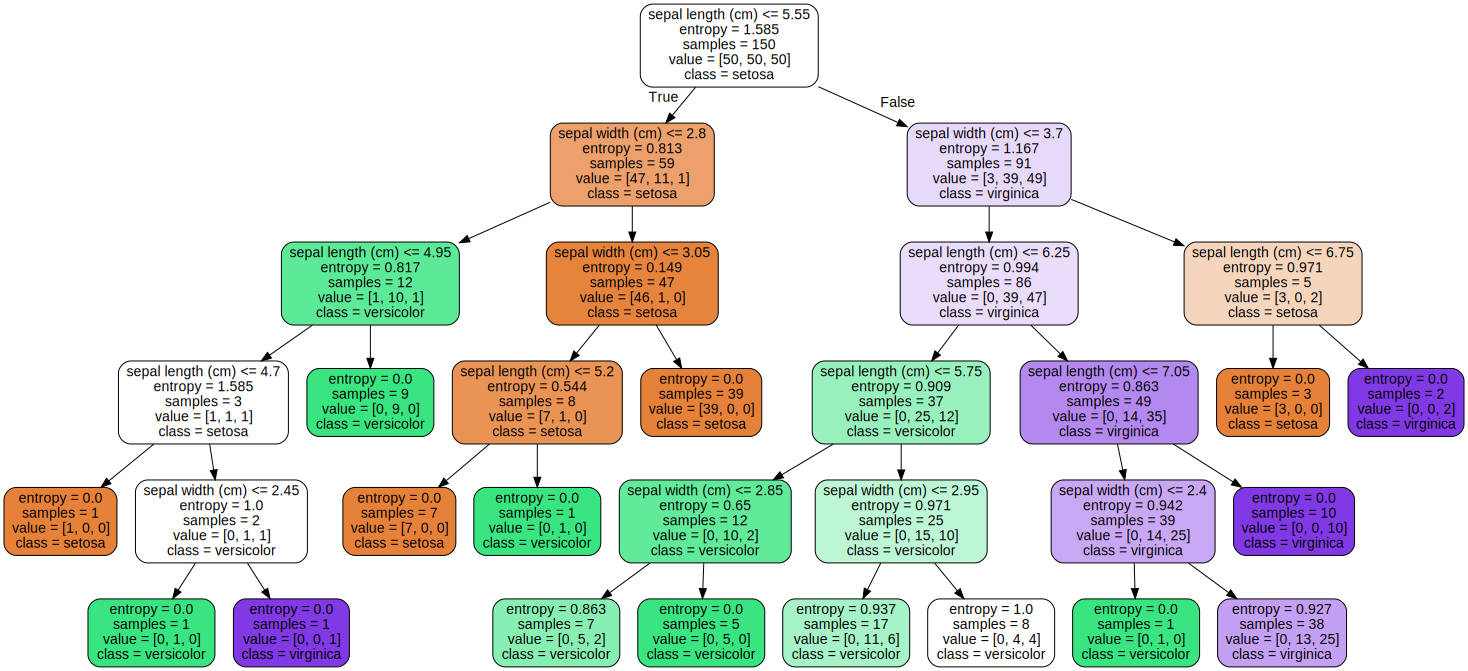

In [38]:
graph_data_5 = export_graphviz(dt_clf_5, feature_names=feature_names,
                              class_names=iris.target_names,
                              rounded=True, filled=True)

graphviz.Source(graph_data_5)

### 붓꽃 데이터
- petal length, petal width

In [39]:
X2 = X[:, 2:]
X2.shape

(150, 2)

In [40]:
feature_names = iris.feature_names[2:]
feature_names

['petal length (cm)', 'petal width (cm)']

In [46]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [52]:
dt_clf = DecisionTreeClassifier()

pipe = Pipeline([("clf", DecisionTreeClassifier())])
pipe

Pipeline(steps=[('clf', DecisionTreeClassifier())])

In [51]:
params = {"clf__max_depth": [depth for depth in range(10)],
         "clf__criterion": ["gini", "entropy"],
         "clf__random_state": [rs for rs in range(0, 50, 10)]}
params

{'clf__max_depth': [0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 'clf__criterion': ['gini', 'entropy'],
 'clf__random_state': [0, 10, 20, 30, 40]}

In [53]:
pipe.fit(X2, y)

Pipeline(steps=[('clf', DecisionTreeClassifier())])

In [54]:
pipe["clf"].score(X2, y)

0.9933333333333333

In [55]:
grid_cv = GridSearchCV(estimator=pipe, param_grid=params, cv=5)
grid_cv.fit(X2, y)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('clf', DecisionTreeClassifier())]),
             param_grid={'clf__criterion': ['gini', 'entropy'],
                         'clf__max_depth': [0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
                         'clf__random_state': [0, 10, 20, 30, 40]})

In [56]:
grid_cv.best_estimator_

Pipeline(steps=[('clf', DecisionTreeClassifier(max_depth=3, random_state=20))])

In [59]:
pd.DataFrame(grid_cv.cv_results_).sort_values("rank_test_score")[:10]

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_clf__criterion,param_clf__max_depth,param_clf__random_state,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
17,0.000399,4.885192e-04,0.000399,0.000489,gini,3,20,"{'clf__criterion': 'gini', 'clf__max_depth': 3...",0.966667,0.966667,0.933333,1.000000,1.0,0.973333,0.024944,1
19,0.000399,4.885776e-04,0.000399,0.000489,gini,3,40,"{'clf__criterion': 'gini', 'clf__max_depth': 3...",0.966667,0.966667,0.933333,1.000000,1.0,0.973333,0.024944,1
23,0.000399,4.886945e-04,0.000399,0.000488,gini,4,30,"{'clf__criterion': 'gini', 'clf__max_depth': 4...",0.966667,0.966667,0.900000,1.000000,1.0,0.966667,0.036515,3
21,0.000399,4.886360e-04,0.000199,0.000399,gini,4,10,"{'clf__criterion': 'gini', 'clf__max_depth': 4...",0.966667,0.966667,0.900000,1.000000,1.0,0.966667,0.036515,3
74,0.000997,2.132481e-07,0.000000,0.000000,entropy,4,40,"{'clf__criterion': 'entropy', 'clf__max_depth'...",0.966667,0.966667,0.900000,0.966667,1.0,0.960000,0.032660,5
75,0.000200,3.990173e-04,0.000199,0.000399,entropy,5,0,"{'clf__criterion': 'entropy', 'clf__max_depth'...",0.966667,0.966667,0.900000,0.966667,1.0,0.960000,0.032660,5
76,0.000601,4.905028e-04,0.000199,0.000399,entropy,5,10,"{'clf__criterion': 'entropy', 'clf__max_depth'...",0.966667,0.966667,0.900000,0.966667,1.0,0.960000,0.032660,5
77,0.000995,4.602405e-06,0.000000,0.000000,entropy,5,20,"{'clf__criterion': 'entropy', 'clf__max_depth'...",0.966667,0.966667,0.900000,0.966667,1.0,0.960000,0.032660,5
28,0.000598,4.885777e-04,0.000399,0.000489,gini,5,30,"{'clf__criterion': 'gini', 'clf__max_depth': 5...",0.966667,0.966667,0.900000,0.966667,1.0,0.960000,0.032660,5
78,0.000000,0.000000e+00,0.000399,0.000489,entropy,5,30,"{'clf__criterion': 'entropy', 'clf__max_depth'...",0.966667,0.966667,0.900000,0.966667,1.0,0.960000,0.032660,5


In [60]:
grid_best_model = grid_cv.best_estimator_
grid_best_model

Pipeline(steps=[('clf', DecisionTreeClassifier(max_depth=3, random_state=20))])

In [64]:
grid_best_model["clf"].get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': 3,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': 20,
 'splitter': 'best'}

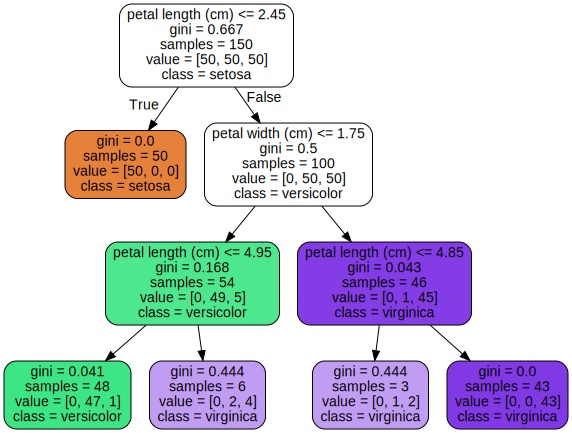

In [65]:
graph_data_grid_best = export_graphviz(grid_best_model["clf"],
                                      feature_names=feature_names,
                                      class_names=iris.target_names,
                                      rounded=True,
                                      filled=True)

graphviz.Source(graph_data_grid_best)

In [66]:
pipe

Pipeline(steps=[('clf', DecisionTreeClassifier())])

In [67]:
pipe_2 = Pipeline([("scaler", StandardScaler()),
                   ("clf", DecisionTreeClassifier())])
grid_cv_2 = GridSearchCV(estimator=pipe_2, param_grid=params, cv=5)
grid_cv_2.fit(X2, y)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('clf', DecisionTreeClassifier())]),
             param_grid={'clf__criterion': ['gini', 'entropy'],
                         'clf__max_depth': [0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
                         'clf__random_state': [0, 10, 20, 30, 40]})

In [68]:
grid_cv_2.best_estimator_

Pipeline(steps=[('scaler', StandardScaler()),
                ('clf', DecisionTreeClassifier(max_depth=3, random_state=20))])

In [71]:
grid_cv_2.best_score_, grid_cv.best_score_

(0.9733333333333334, 0.9733333333333334)

In [74]:
pd.DataFrame(grid_cv_2.cv_results_).sort_values("rank_test_score")[:10]

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_clf__criterion,param_clf__max_depth,param_clf__random_state,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
17,0.000997,1.665521e-06,0.000199,0.000399,gini,3,20,"{'clf__criterion': 'gini', 'clf__max_depth': 3...",0.966667,0.966667,0.933333,1.000000,1.0,0.973333,0.024944,1
19,0.000997,1.784161e-07,0.000000,0.000000,gini,3,40,"{'clf__criterion': 'gini', 'clf__max_depth': 3...",0.966667,0.966667,0.933333,1.000000,1.0,0.973333,0.024944,1
23,0.000997,9.536743e-08,0.000000,0.000000,gini,4,30,"{'clf__criterion': 'gini', 'clf__max_depth': 4...",0.966667,0.966667,0.900000,1.000000,1.0,0.966667,0.036515,3
21,0.000997,2.780415e-07,0.000000,0.000000,gini,4,10,"{'clf__criterion': 'gini', 'clf__max_depth': 4...",0.966667,0.966667,0.900000,1.000000,1.0,0.966667,0.036515,3
74,0.000997,1.784161e-07,0.000000,0.000000,entropy,4,40,"{'clf__criterion': 'entropy', 'clf__max_depth'...",0.966667,0.966667,0.900000,0.966667,1.0,0.960000,0.032660,5
75,0.000798,3.991618e-04,0.000199,0.000399,entropy,5,0,"{'clf__criterion': 'entropy', 'clf__max_depth'...",0.966667,0.966667,0.900000,0.966667,1.0,0.960000,0.032660,5
76,0.000798,3.989458e-04,0.000199,0.000399,entropy,5,10,"{'clf__criterion': 'entropy', 'clf__max_depth'...",0.966667,0.966667,0.900000,0.966667,1.0,0.960000,0.032660,5
77,0.000997,1.168008e-07,0.000000,0.000000,entropy,5,20,"{'clf__criterion': 'entropy', 'clf__max_depth'...",0.966667,0.966667,0.900000,0.966667,1.0,0.960000,0.032660,5
28,0.000997,1.168008e-07,0.000000,0.000000,gini,5,30,"{'clf__criterion': 'gini', 'clf__max_depth': 5...",0.966667,0.966667,0.900000,0.966667,1.0,0.960000,0.032660,5
78,0.000997,5.091228e-07,0.000000,0.000000,entropy,5,30,"{'clf__criterion': 'entropy', 'clf__max_depth'...",0.966667,0.966667,0.900000,0.966667,1.0,0.960000,0.032660,5


### 붓꽃 데이터 전체

In [75]:
pipe = Pipeline([('scaler', StandardScaler()),
                ('clf', DecisionTreeClassifier())])

params = {"clf__max_depth": [depth for depth in range(10)],
         "clf__min_samples_split": [split for split in range(10)],
         "clf__criterion": ["gini", "entropy"],
         "clf__random_state": [r for r in range(0, 50, 10)]}

grid_cv = GridSearchCV(estimator=pipe, param_grid=params, cv=5)
grid_cv.fit(X, y)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('clf', DecisionTreeClassifier())]),
             param_grid={'clf__criterion': ['gini', 'entropy'],
                         'clf__max_depth': [0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
                         'clf__min_samples_split': [0, 1, 2, 3, 4, 5, 6, 7, 8,
                                                    9],
                         'clf__random_state': [0, 10, 20, 30, 40]})

In [76]:
grid_cv.best_score_

0.9733333333333334

In [77]:
grid_cv.best_estimator_

Pipeline(steps=[('scaler', StandardScaler()),
                ('clf', DecisionTreeClassifier(max_depth=3, random_state=10))])

In [79]:
grid_cv.best_estimator_["clf"].get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': 3,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': 10,
 'splitter': 'best'}

In [85]:
pd.DataFrame({"feature": list(iris.feature_names),
             "importance": grid_cv.best_estimator_["clf"].feature_importances_},
            columns=["feature", "importance"]).sort_values("importance", ascending=False)

,feature,importance
3,petal width (cm),0.946064
2,petal length (cm),0.053936
0,sepal length (cm),0.000000
1,sepal width (cm),0.000000
